### Importing required library 

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Embedding, Dense, LSTM, Bidirectional,Dropout
from keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, roc_curve,roc_auc_score
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import math
import seaborn as sns
import matplotlib.pyplot as plt

### Mounting Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading Dataset 

In [ ]:
trainData =  pd.read_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Train.csv")
valData =  pd.read_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Validation.csv")
testData =  pd.read_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJN_Test.csv")

# Data =  pd.read_csv("/content/drive/MyDrive/Final Project/Code/Dataset/Dataset_BHS_MJNcs.csv") 

In [ ]:
trainData

,Data,Catergory,Label
0,গাড়ি উড়োজাহাজ আর হেলিকপটার তো খিরিসটানরা বানাই...,Religious,0
1,ওরে চা খাওয়ান সব ঠিক হয়ে যাবে??,Religious,0
2,আমার জাছে আয় চুদে তোর ভদার রস বের করে দিবো আয় ...,Political,1
3,"আপনি ভাল বলেছেন ,ও যদি আসতে চাই আপনি গ্রহণ করি...",Sports,0
4,আম্পায়ার এর ডিসিসনে সংসয় থাকলেও সেটা আগে দিত...,Sports,0
...,...,...,...
6044,ডিভোর্সের তারিখ টা ঠিক করে রাখছিস????,Enternainment,0
6045,কুত্তায় ও খাইবেনা ওর পঁচা দেহ,Others,1
6046,একেবারে সেফুদা,Others,0
6047,আপনার জন্ম টা যে পতিতালয় কনডম দূর্ঘটনায় হয়েছে ...,Religious,1


In [ ]:
valData

,Data,Catergory,Label
0,কাকা ফোন না ম্বার টা দিবেন,Religious,0
1,"যুগটা বিজ্ঞানের, গলাটা মৌলবাদের!",Religious,1
2,টাকা আমরা দিব,Enternainment,0
3,টাকলু হালা শেফুদর,Enternainment,1
4,আপনাদের নিউজের তারেক দিচ্ছেন না কেন,Political,0
...,...,...,...
1289,"একটা পাডা আরেক টা পাডি,,,,লগে এত্তগুলা ছাগলের ...",Enternainment,0
1290,কুকুরের লেজের মতয় ছাএলিগ জতয় ছাইবে সোজা করতে ক...,Political,1
1291,এগুলো জামায়াত বিএনপি র গভীর ষড়যন্ত্র,Political,0
1292,ভাই সাবাস চালিয়ে যান হয় তো কোন এক দিন আপনার কথ...,Political,0


In [ ]:
testData

,Data,Catergory,Label
0,পরিমনী বাংলার মানুষের কাছে এক বড় পতিতার নাম,Enternainment,1
1,আসসালামু আলাইকুম ভাই অসংখ্য ধন্যবাদ আপনাকে সত্...,Religious,0
2,এই কুত্তার বাচ্চা তুই কি অলিপুরিকে চিনিস ? যাক...,Religious,1
3,সালমান মোক্তাদির ভক্ত করা তাদের দেখতে চাই হালা...,Enternainment,1
4,সব সহ্য করতে হবে!,Sports,0
...,...,...,...
1289,ওই নটির ফুয়া হালার আবাদি কিতা মাতোচ,Religious,1
1290,বাজে মাগি।,Others,1
1291,এই পোস্টে সম্পর্কে আমি যা বলতে চেয়েছি তা আমার ...,Others,0
1292,এই শালা বড় চোর,Political,1


### Data Preprocessing 

#### Data Analysis

In [ ]:
# Dataset Information
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6049 entries, 0 to 6048
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       6049 non-null   object
 1   Catergory  6049 non-null   object
 2   Label      6049 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 141.9+ KB


In [ ]:
trainData.isnull().any()

Data         False
Catergory    False
Label        False
dtype: bool

In [ ]:
valData.isnull().any()

Data         False
Catergory    False
Label        False
dtype: bool

In [ ]:
testData.isnull().any()

Data         False
Catergory    False
Label        False
dtype: bool

In [ ]:
trainData['Label'].value_counts()

0    3203
1    2846
Name: Label, dtype: int64

In [ ]:
valData['Label'].value_counts()

0    675
1    619
Name: Label, dtype: int64

In [ ]:
testData['Label'].value_counts()

0    696
1    598
Name: Label, dtype: int64

In [ ]:
category_list = trainData.Catergory.unique()
print(category_list)

['Religious' 'Political' 'Sports' 'Others' 'Enternainment']


In [ ]:
x = (trainData.groupby('Catergory')['Data']
                            .apply(lambda x: np.mean(x.str.len()))
                            .reset_index(name='mean_char_text')
                            .sort_values(by='mean_char_text',ascending=False))
print (x)

       Catergory  mean_char_text
4         Sports       78.448772
3      Religious       70.538946
0  Enternainment       67.350565
2      Political       63.949264
1         Others       55.794195


In [ ]:
trainData.groupby('Catergory').Data.apply(lambda x: x.str.split().str.len().mean()).sort_values(ascending=False)

Catergory
Sports           14.011854
Religious        12.534225
Enternainment    12.340065
Political        11.386252
Others           10.189974
Name: Data, dtype: float64

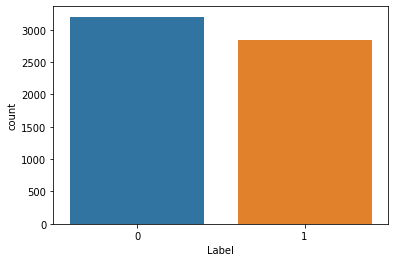

In [ ]:
sns.countplot(x=trainData['Label']);

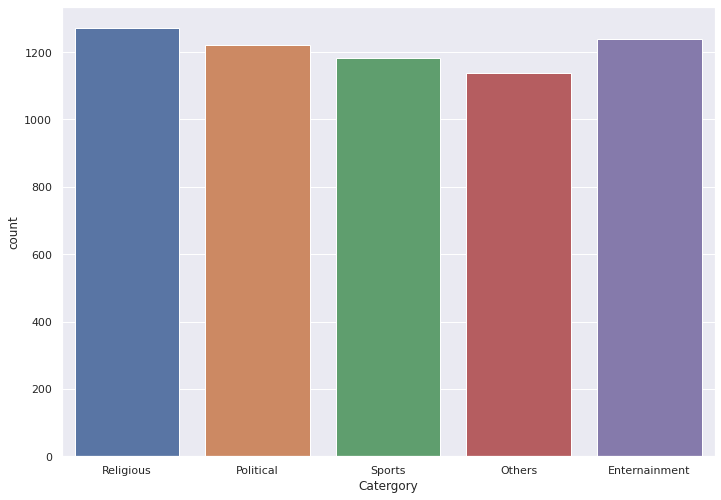

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=trainData['Catergory']);

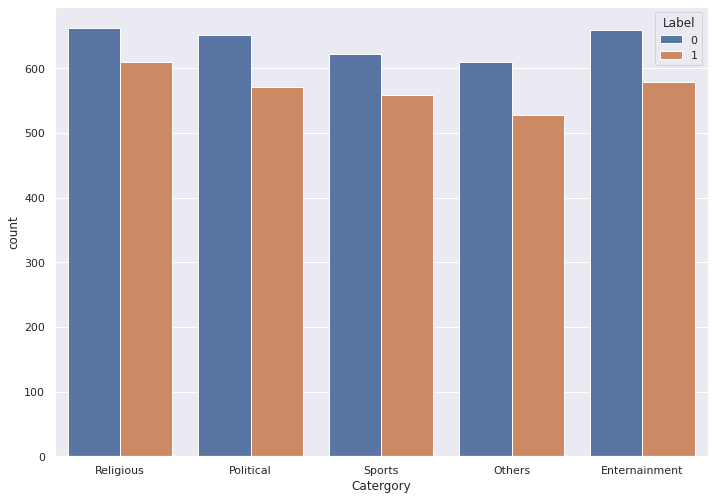

In [ ]:
sns.countplot(data=trainData, x="Catergory", hue="Label")

In [ ]:
# Count of Texts in Each Category
counttxt = trainData.groupby('Catergory').count()['Data'].reset_index().sort_values(by='Data',ascending=False)
counttxt.style.background_gradient(cmap='Reds')

,Catergory,Data
3,Religious,1271
0,Enternainment,1238
2,Political,1222
4,Sports,1181
1,Others,1137


#### Droping Irrelevent Data

In [ ]:
print(ord('৯'))

2543


In [ ]:
# a = "দেশের রাজনীতি দিনকে দিন ০১২৩৪৫৬৭৮৯   পচে যাচ্ছে। पैरेनकाइमा कोशिकाएं . what a shame. সুস্থ থাকা দায়।"

# a = "".join(i for i in a if ( 2432 <= ord(i) <=2533 or 2544 <= ord(i) <= 2559) or ord(i)== 32)
# a=" ".join(a.split())
# print(a)

In [ ]:
def preprocessing(text):

  # text = "".join(i for i in text if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  # text = "".join(i for i in text if  2432 <= ord(i) <= 2559 or ord(i)== 32)
  text = "".join(i for i in text if ( 2432 <= ord(i) <=2533 or 2544 <= ord(i) <= 2559) or ord(i)== 32)
  text=" ".join(text.split())
  return text

In [ ]:
trainData['Data'] = trainData.Data.apply(lambda x: preprocessing(str(x)))
valData['Data'] = valData.Data.apply(lambda x: preprocessing(str(x)))
testData['Data'] = testData.Data.apply(lambda x: preprocessing(str(x)))

In [ ]:
trainData.head(20)

,Data,Catergory,Label
0,গাড়ি উড়োজাহাজ আর হেলিকপটার তো খিরিসটানরা বানাই...,Religious,0
1,ওরে চা খাওয়ান সব ঠিক হয়ে যাবে,Religious,0
2,আমার জাছে আয় চুদে তোর ভদার রস বের করে দিবো আয় ...,Political,1
3,আপনি ভাল বলেছেন ও যদি আসতে চাই আপনি গ্রহণ করিব...,Sports,0
4,আম্পায়ার এর ডিসিসনে সংসয় থাকলেও সেটা আগে দিত...,Sports,0
5,এইসব পাগল ছাগল টিভির পর্দায় আসে কোথার থেকে,Political,0
6,বাল পাখনা কথা বলে,Others,1
7,হায়রে মূর্খের বাচ্চা তুই তো ছাগলের তিন নাম্বার...,Religious,1
8,এই কুত্তার বাচ্চা কে কোথায় পাবো,Religious,1
9,আল্লাহ সুন্নি নামেই এদের ভন্ডামীদের হেদায়াত নছ...,Religious,1


In [ ]:
valData.head(5)

,Data,Catergory,Label
0,কাকা ফোন না ম্বার টা দিবেন,Religious,0
1,যুগটা বিজ্ঞানের গলাটা মৌলবাদের,Religious,1
2,টাকা আমরা দিব,Enternainment,0
3,টাকলু হালা শেফুদর,Enternainment,1
4,আপনাদের নিউজের তারেক দিচ্ছেন না কেন,Political,0


In [ ]:
testData.head(5)

,Data,Catergory,Label
0,পরিমনী বাংলার মানুষের কাছে এক বড় পতিতার নাম,Enternainment,1
1,আসসালামু আলাইকুম ভাই অসংখ্য ধন্যবাদ আপনাকে সত্...,Religious,0
2,এই কুত্তার বাচ্চা তুই কি অলিপুরিকে চিনিস যাকে ...,Religious,1
3,সালমান মোক্তাদির ভক্ত করা তাদের দেখতে চাই হালা...,Enternainment,1
4,সব সহ্য করতে হবে,Sports,0


#### Spliting Dataset into Features, Lebels and Catagory

In [ ]:
#Spliting Train Dataset into Features, Lebels and Catagory

train_docs = trainData.iloc[:, 0]
train_ctgs = trainData.iloc[:, 1]
train_lbls = trainData.iloc[:, -1]

In [ ]:
train_docs

0       গাড়ি উড়োজাহাজ আর হেলিকপটার তো খিরিসটানরা বানাই...
1                           ওরে চা খাওয়ান সব ঠিক হয়ে যাবে
2       আমার জাছে আয় চুদে তোর ভদার রস বের করে দিবো আয় ...
3       আপনি ভাল বলেছেন ও যদি আসতে চাই আপনি গ্রহণ করিব...
4       আম্পায়ার এর ডিসিসনে সংসয় থাকলেও সেটা আগে দিত...
                              ...                        
6044                    ডিভোর্সের তারিখ টা ঠিক করে রাখছিস
6045                       কুত্তায় ও খাইবেনা ওর পঁচা দেহ
6046                                       একেবারে সেফুদা
6047    আপনার জন্ম টা যে পতিতালয় কনডম দূর্ঘটনায় হয়েছে ...
6048                                           মাগির পোলা
Name: Data, Length: 6049, dtype: object

In [ ]:
train_lbls

0       0
1       0
2       1
3       0
4       0
       ..
6044    0
6045    1
6046    0
6047    1
6048    1
Name: Label, Length: 6049, dtype: int64

In [ ]:
#Spliting Validation Dataset into Features, Lebels and Catagory

val_docs = valData.iloc[:, 0]
val_ctgs = valData.iloc[:, 1]
val_lbls = valData.iloc[:, -1]

In [ ]:
val_lbls

0       0
1       1
2       0
3       1
4       0
       ..
1289    0
1290    1
1291    0
1292    0
1293    0
Name: Label, Length: 1294, dtype: int64

In [ ]:
#Spliting Test Dataset into Features, Lebels and Catagory

test_docs = testData.iloc[:, 0]
test_ctgs = testData.iloc[:, 1]
test_lbls = testData.iloc[:, -1]

In [ ]:
test_lbls

0       1
1       0
2       1
3       1
4       0
       ..
1289    1
1290    1
1291    0
1292    1
1293    0
Name: Label, Length: 1294, dtype: int64

In [ ]:
# Assigning catagories int value
ctg_dic = {}
for indx, val in enumerate(category_list):
  ctg_dic[val] = indx
print(ctg_dic)

# Converting catagories into int value
ctg_int = []
for val in train_ctgs:
  ctg_int.append(ctg_dic[val])

ctg_int = np.array(ctg_int)
print(ctg_int)

{'Religious': 0, 'Political': 1, 'Sports': 2, 'Others': 3, 'Enternainment': 4}
[0 0 1 ... 3 0 0]


#### Tokenization

In [ ]:
tokenizer = Tokenizer()

# tokenization and converting words into sequences of Train Document
tokenizer.fit_on_texts(train_docs)
sequences_train_docs = tokenizer.texts_to_sequences(train_docs)

# tokenization and converting words into sequence of Validation Document
sequences_val_docs = tokenizer.texts_to_sequences(val_docs)

# tokenization and converting words into sequence of Test Document
sequences_test_docs = tokenizer.texts_to_sequences(test_docs)

In [ ]:
# for x in dense_train_docs:
#   print(x)

In [ ]:
# padding the training documents in order to make them equal length
MAX_LENGTH = 30  #If maxlen=None sequences will be padded to the length of the longest individual sequence.

padded_train_docs = pad_sequences(sequences_train_docs, maxlen=MAX_LENGTH, padding='post') 
# for pd_sen in padded_train_ex:
#   print(pd_sen)

In [ ]:
#finding Maximum number in padded_train_docs for VOCAB_SIZE
maxnum = np.max(padded_train_docs)
print(maxnum)

15072


In [ ]:
# padding the Validation documents
padded_val_docs = pad_sequences(sequences_val_docs, maxlen=MAX_LENGTH, padding='post')

# padding the test documents
padded_test_docs = pad_sequences(sequences_test_docs, maxlen=MAX_LENGTH, padding='post')

In [ ]:
VOCAB_SIZE = 15073

###Model Building

In [ ]:
# # Building the CNN Model
# model = Sequential()      

# model.add(Embedding(VOCAB_SIZE, 100, input_length=MAX_LENGTH))
# model.add(Conv1D(100, 3, activation='sigmoid'))
# model.add(MaxPooling1D())
# model.add(Flatten())
# model.add(Dense(64, activation='sigmoid'))
# model.add(Dense(32, activation='sigmoid'))
# model.add(Dense(16, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid', name='output_layer'))

# print(model.summary())

In [ ]:
forward_layers = tf.keras.layers.LSTM(units=128, return_sequences=False)
backward_layers = tf.keras.layers.LSTM(units=128, return_sequences=False, go_backwards=True)

model = keras.Sequential(
    [
      # Embedding Layer
      keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=300, input_length=MAX_LENGTH),
     
      # Flatten Layer
      # keras.layers.Flatten(),
      # #NN
      # keras.layers.Dense(units=300, activation=tf.keras.activations.relu, name='hidden_layer_1'),
      # keras.layers.Dense(units=200, activation=tf.keras.activations.relu, name='hidden_layer_2'),
      # keras.layers.Dense(units=160, activation=tf.keras.activations.relu, name='hidden_layer_3'),
      # keras.layers.Dense(units=80, activation=tf.keras.activations.relu, name='hidden_layer_4'),
      # keras.layers.Dense(units=40, activation=tf.keras.activations.relu, name='hidden_layer_5'),
      # keras.layers.Dense(units=2, activation=tf.keras.activations.relu, name='hidden_layer_6'),
     
      # LSTM - for better performance
      keras.layers.LSTM(units=300, dropout=0.2),
      keras.layers.Dense(units=128, activation='sigmoid'),
      keras.layers.Dense(units=64, activation='sigmoid'),
      # keras.layers.Dense(units=32, activation='sigmoid'),
     
      # Bidirectional LSTM
      # keras.layers.Bidirectional(layer=forward_layers, backward_layer=backward_layers),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(64, activation='sigmoid'),
      # keras.layers.Dense(32, activation='sigmoid'),
      
      #GRU
      # keras.layers.SpatialDropout1D(0.3),
      # keras.layers.GRU(200),
      # keras.layers.Dense(64, activation='sigmoid'),
     
      # Output Layer
      keras.layers.Dense(units=1, activation='sigmoid', name='output_layer')
      # keras.layers.Dense(units=1, activation=tf.keras.activations.swish, name='output_layer')
    ]
)


In [ ]:
# binary_crossentropy, mean_absolute_percentage_error, MeanSquaredError(), mean_squared_logarithmic_error

# model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])  # best combination


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           4521900   
                                                                 
 lstm_2 (LSTM)               (None, 300)               721200    
                                                                 
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 5,289,949
Trainable params: 5,289,949
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(padded_train_docs, train_lbls, epochs=50,   validation_data=(padded_val_docs, val_lbls), verbose=1)

Epoch 1/50
190/190 [==============================] - 43s 212ms/step - loss: 0.2508 - accuracy: 0.5135 - val_loss: 0.2521 - val_accuracy: 0.5216
Epoch 2/50
190/190 [==============================] - 42s 224ms/step - loss: 0.2515 - accuracy: 0.5171 - val_loss: 0.2950 - val_accuracy: 0.4204
Epoch 3/50
190/190 [==============================] - 39s 206ms/step - loss: 0.2373 - accuracy: 0.6095 - val_loss: 0.2279 - val_accuracy: 0.6383
Epoch 4/50
190/190 [==============================] - 39s 205ms/step - loss: 0.2313 - accuracy: 0.6338 - val_loss: 0.2246 - val_accuracy: 0.6561
Epoch 5/50
190/190 [==============================] - 39s 206ms/step - loss: 0.2107 - accuracy: 0.6952 - val_loss: 0.2154 - val_accuracy: 0.6886
Epoch 6/50
190/190 [==============================] - 39s 205ms/step - loss: 0.1991 - accuracy: 0.7276 - val_loss: 0.2148 - val_accuracy: 0.6893
Epoch 7/50
190/190 [==============================] - 39s 205ms/step - loss: 0.1972 - accuracy: 0.7319 - val_loss: 0.2172 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


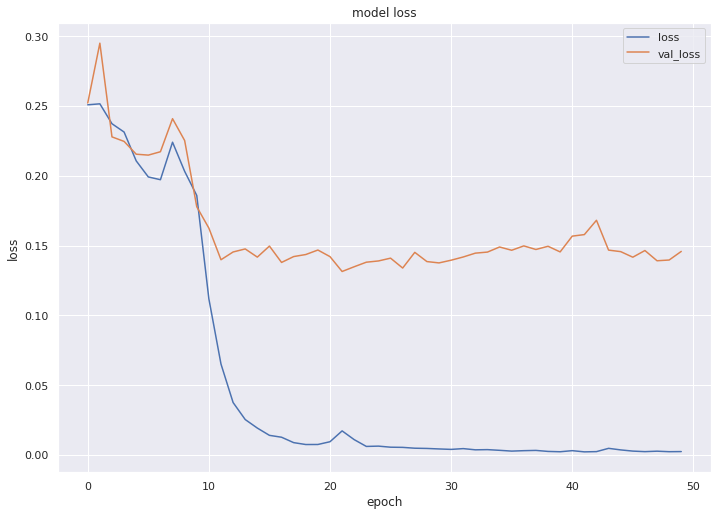

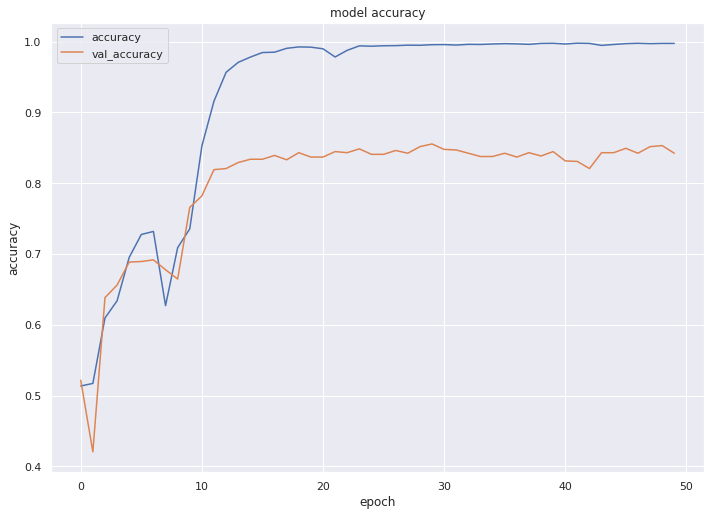

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

### Performence Evaluation

In [ ]:
loss_and_metrics = model.evaluate(padded_train_docs, train_lbls,batch_size=64)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(padded_test_docs, test_lbls,batch_size=64)
print("The test accuracy is: "+str(loss_and_metrics[1]))

95/95 [==============================] - 7s 78ms/step - loss: 0.0020 - accuracy: 0.9980
The train accuracy is: 0.9980161786079407
21/21 [==============================] - 2s 75ms/step - loss: 0.2390 - accuracy: 0.7457
The test accuracy is: 0.7457495927810669


In [ ]:
# predict = model.predict_classes(padded_test_docs, verbose=0)
predictions = (model.predict(padded_test_docs) > 0.5).astype("int32")


41/41 [==============================] - 2s 46ms/step


In [ ]:
predictions= np.array(predictions)
predictions

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

#### Classification Report

In [ ]:
print(classification_report(test_lbls, predictions, target_names = ['NH (Class 0)','Hate (Class 1)']))

                precision    recall  f1-score   support

  NH (Class 0)       0.77      0.75      0.76       696
Hate (Class 1)       0.72      0.74      0.73       598

      accuracy                           0.75      1294
     macro avg       0.74      0.75      0.74      1294
  weighted avg       0.75      0.75      0.75      1294



#### Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(test_lbls,predictions)

In [ ]:
# sns.heatmap(cf_matrix, annot=True, fmt='',cmap='Blues' )

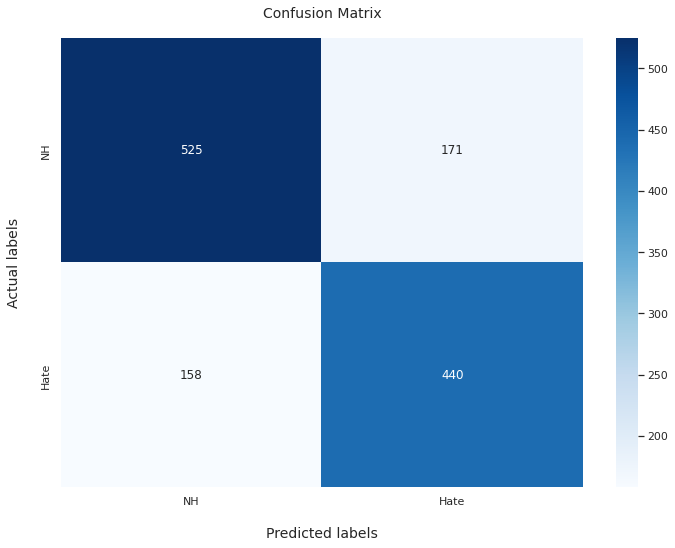

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues' )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted labels", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['NH', 'Hate'])

# set y-axis label and ticks
ax.set_ylabel("Actual labels", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['NH', 'Hate'])

# set plot title
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

plt.show()

#### ROC AUC

In [ ]:
auc = roc_auc_score(test_lbls,predictions)
auc

0.7450481490024219

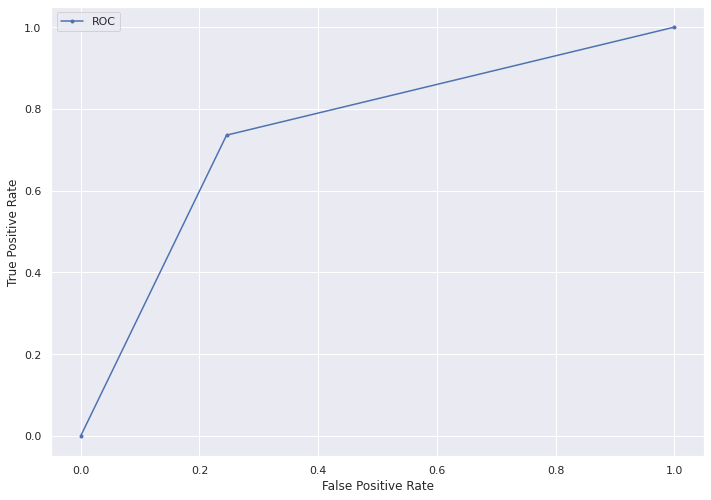

In [ ]:
# calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(test_lbls,predictions)
fpr, tpr, _ = roc_curve(test_lbls,predictions)
# plot the roc curve for the model
# plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ROC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()